# Test kNN and Logistic Regression on the titanic.csv dataset

## Basic models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
df = pd.read_csv('data/titanic.csv')   # modify path if needed
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# Percentage of passengers survived
surv_pct = df["Survived"].sum()/len(df)
round(surv_pct*100, 1)

38.4

In [5]:
# Percentage of passengers survived by sex
surv_pct_m = df[df["Sex"]=="male"]["Survived"].sum()/len(df)

surv_pct_f = df[df["Sex"]=="female"]["Survived"].sum()/len(df)

print("Percentage of survived males:", round(surv_pct_m*100, 1))
print("Percentage of survived females:", round(surv_pct_f*100, 1))

Percentage of survived males: 12.2
Percentage of survived females: 26.2


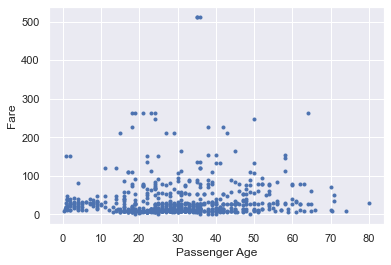

In [6]:
# Age and Fare
plt.plot(df["Age"], df["Fare"], ".")
plt.xlabel("Passenger Age")
plt.ylabel("Fare");

In [7]:
# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['Pclass', 'SibSp', 'Parch', 'Fare']], df["Survived"], test_size=0.25, random_state=123)  # 25% pct as test set, random_state=123 to have same results for each re-run

In [8]:
# KNN
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)

# LOGISTIC REGRESSION
lr = LogisticRegression().fit(X_train, y_train)
acc_lr = round(lr.score(X_test, y_test) * 100, 2)

print(acc_knn)
print(acc_lr)

69.96
68.61


In [9]:
# Change the neighbors in the kNN classifier
neighbors = [5, 10, 20, 40, 80]
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train, y_train)
    acc_knn = round(knn.score(X_test, y_test) * 100, 2)
    print(f"kNN accuracy on test data with n = {neighbor} neighbors:", acc_knn)

kNN accuracy on test data with n = 5 neighbors: 71.3
kNN accuracy on test data with n = 10 neighbors: 73.54
kNN accuracy on test data with n = 20 neighbors: 69.96
kNN accuracy on test data with n = 40 neighbors: 74.44
kNN accuracy on test data with n = 80 neighbors: 67.26


In [10]:
# Add Sex variable
df["Sex_dummy"] = np.where(df["Sex"]=="male", 0, 1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(df[['Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_dummy']], df["Survived"], test_size=0.25, random_state=123)

In [11]:
# KNN
neighbors = [5, 10, 20, 40, 80]
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train1, y_train1)
    acc_knn = round(knn.score(X_test1, y_test1) * 100, 2)
    print(f"kNN accuracy on test data with n = {neighbor} neighbors:", acc_knn)

# LOGISTIC REGRESSION
lr = LogisticRegression().fit(X_train1, y_train1)
acc_lr = round(lr.score(X_test1, y_test1) * 100, 2)

print("Logistic regression accuracy on test data:", acc_lr)

# Sex variable seems useful

kNN accuracy on test data with n = 5 neighbors: 77.58
kNN accuracy on test data with n = 10 neighbors: 78.92
kNN accuracy on test data with n = 20 neighbors: 77.58
kNN accuracy on test data with n = 40 neighbors: 76.23
kNN accuracy on test data with n = 80 neighbors: 66.82
Logistic regression accuracy on test data: 80.72


## Models Evaluation

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, plot_roc_curve, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

In [13]:
# 1) CLASSIFICATION REPORT: kNN vs Logistic regression (with Sex)

knn = KNeighborsClassifier(n_neighbors=10).fit(X_train1, y_train1)
lr = LogisticRegression().fit(X_train1, y_train1)

pred_knn = knn.predict(X_test1)
pred_lr = lr.predict(X_test1)

print("kNN Classification report")
print(classification_report(y_test1, pred_knn))
print("Logistic regression Classification report")
print(classification_report(y_test1, pred_lr))

kNN Classification report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       139
           1       0.73      0.70      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223

Logistic regression Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.78      0.68      0.73        84

    accuracy                           0.81       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.81      0.81      0.80       223



In [14]:
# 2) CONFUSION MATRIX: kNN vs Logistic regression (with Sex)

print("kNN Confusion matrix")
print(confusion_matrix(y_test1, pred_knn))
print("Logistic regression Confusion matrix")
print(confusion_matrix(y_test1, pred_lr))

kNN Confusion matrix
[[117  22]
 [ 25  59]]
Logistic regression Confusion matrix
[[123  16]
 [ 27  57]]


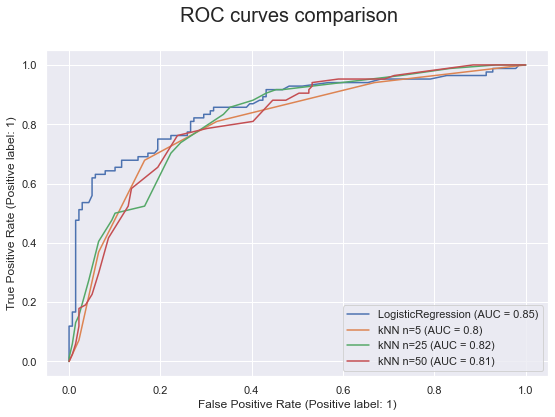

In [15]:
# 3) ROC CURVE: ROC curves comparison
fig = plot_roc_curve(lr, X_test1, y_test1)
neighbors = [5, 25, 50]
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train1, y_train1)
    # compute AUC to add it to the chart legend
    probs = knn.predict_proba(X_test1) 
    probs1 = [j for i, j in probs]
    fpr, tpr, thresholds = roc_curve(y_test1, probs1)
    AUC = auc(fpr, tpr)
    fig = plot_roc_curve(knn, X_test1, y_test1, ax = fig.ax_, label=f"kNN n={neighbor} (AUC = {round(AUC, 2)})")
# Set figure size and title
fig.figure_.set_figheight(6)
fig.figure_.set_figwidth(9)
fig.figure_.suptitle("ROC curves comparison", fontsize=20);

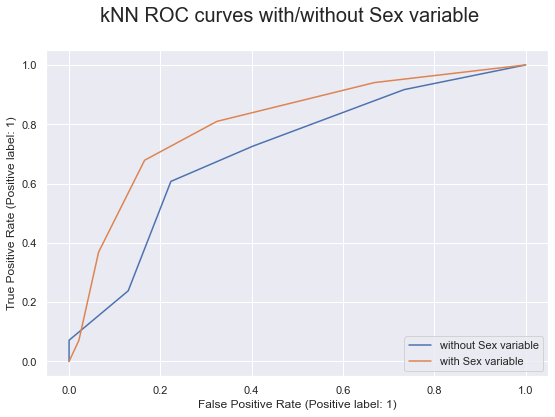

In [16]:
# ROC with and without Sex variable
knn1 = KNeighborsClassifier().fit(X_train, y_train)
knn2 = KNeighborsClassifier().fit(X_train1, y_train1)  # X_train1/X_test1 --> Sex variable added

fig = plot_roc_curve(knn1, X_test, y_test, label="without Sex variable")
fig = plot_roc_curve(knn2, X_test1, y_test1, ax = fig.ax_, label="with Sex variable")
fig.figure_.set_figheight(6)
fig.figure_.set_figwidth(9)
fig.figure_.suptitle("kNN ROC curves with/without Sex variable", fontsize=20);

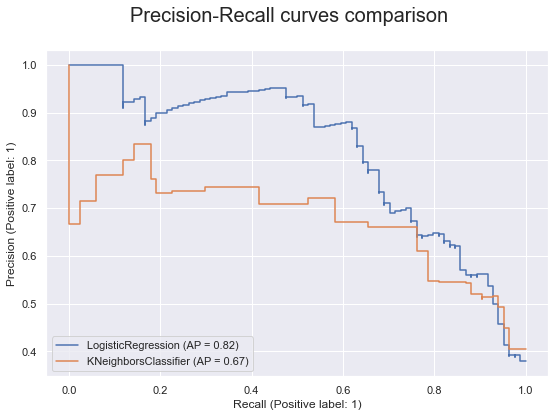

In [17]:
# 4) PRECISION-RECALL CURVE
fig = plot_precision_recall_curve(lr, X_test1, y_test1)
fig = plot_precision_recall_curve(knn, X_test1, y_test1, ax = fig.ax_)
fig.figure_.set_figheight(6)
fig.figure_.set_figwidth(9)
fig.figure_.suptitle("Precision-Recall curves comparison", fontsize=20);

## ROC Curve function
Replicate sklearn.metrics.roc_curve: **https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html**

In [27]:
def my_roc_curve(y_test_set, model_predicted_prob, th_formula = False):
    """
    Re-create the sklearn structure without all the customization features (such as 'pos_label', 'sample_weight' or 'drop_intermediate')
    INPUTS: true target variable values (accept only y = {0, 1}) and predicted probabilities for target class (y = 1)
    OUTPUT: numpy arrays; false positive rates, true positive rates, thresholds
    """
    y = np.array(y_test_set)
    p = np.array(model_predicted_prob)
    # Define thresholds 
    n_thres = len(np.unique(p)) + 1   # formula for optimal number of thresholds
    # https://stats.stackexchange.com/questions/362458/how-does-number-of-thresholds-get-chosen-in-roc-curve-function-in-scikit-learn/362614 
    if th_formula == False: th = np.arange(0.0, 1.0, 0.01)  # arbitrary thresholds
    else: th = np.linspace(0.0, 1.0, num=n_thres)
    th = np.sort(th)[::-1]  # sort descending
    FPR = []
    TPR = []
    for t in th:
        tn = 0   # true negative
        fn = 0   # false negative
        tp = 0   # true positive
        fp = 0   # false positive
        for prob, true in zip(p, y):
            if prob >= t and true == 1: tp += 1
            elif prob >= t and true == 0: fp += 1
            elif prob < t and true == 1: fn += 1
            elif prob < t and true == 0: tn += 1
        fp_rate = fp/(fp + tn)  # compute false positive rate given threshold
        tp_rate = tp/(tp + fn)  # compute true positive rate given threshold
        FPR.append(fp_rate)
        TPR.append(tp_rate)
    return np.array(FPR), np.array(TPR), np.array(th)

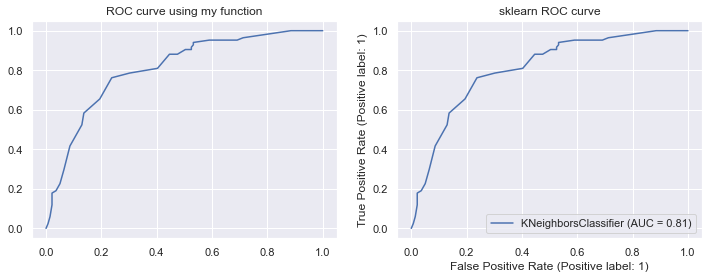

In [28]:
# Test the function
probs = knn.predict_proba(X_test1) 
probs1 = [j for i, j in probs]
fpr, tpr, thresholds = my_roc_curve(y_test1, probs1)

fig, axs = plt.subplots(1,2, figsize=(12,4))
axs[0].plot(fpr, tpr)
axs[0].set_title("ROC curve using my function")
plot_roc_curve(knn, X_test1, y_test1, ax=axs[1])
axs[1].set_title("sklearn ROC curve");

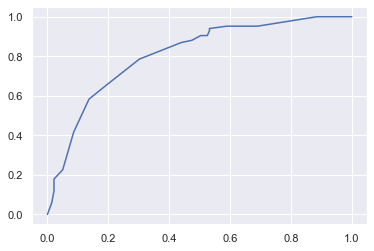

In [29]:
# Repeat with different thresholds method
fpr, tpr, thresholds = my_roc_curve(y_test1, probs1, th_formula=True)
plt.plot(fpr, tpr);

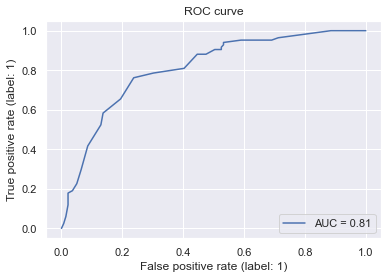

In [31]:
def my_roc_curve_plot(y_test_set, model_predicted_prob, th_formula = False):
    """
    Same INPUTS as my_roc_curve, no parameters for plot customization
    OUTPUT: matplotlib chart
    """
    # use function defined above
    fpr, tpr, _ = my_roc_curve(y_test_set=y_test_set, model_predicted_prob=model_predicted_prob, th_formula = th_formula)
    # use np.trapz() to compute the area below the ROC curve (integrate using the composite trapezoidal rule)
    auc = round(abs(np.trapz(tpr, fpr)), 2)
    # https://numpy.org/doc/stable/reference/generated/numpy.trapz.html
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate (label: 1)")
    plt.ylabel("True positive rate (label: 1)")
    plt.legend([f"AUC = {auc}"], loc='lower right')
    plt.title("ROC curve");

# Same result as before
my_roc_curve_plot(y_test1, probs1)   # AUC is equal (0.81) for th_formula=True

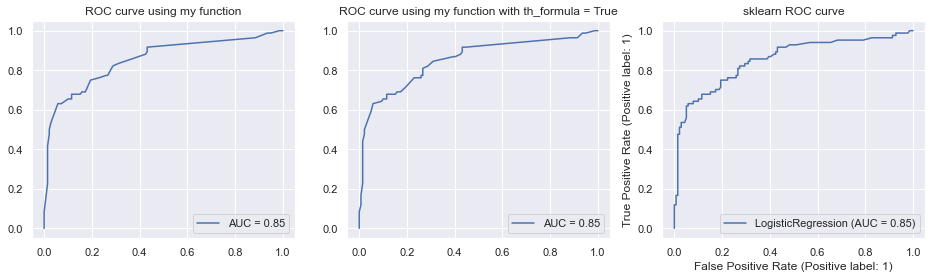

In [36]:
# Test on Logistic Regression
probs_lr = lr.predict_proba(X_test1) 
probs1_lr = [j for i, j in probs_lr]
fpr, tpr, thresholds = my_roc_curve(y_test1, probs1_lr)
auc = round(abs(np.trapz(tpr, fpr)), 2)
fpr1, tpr1, thresholds = my_roc_curve(y_test1, probs1_lr, th_formula=True)
auc1 = round(abs(np.trapz(tpr1, fpr1)), 2)

fig, axs = plt.subplots(1,3, figsize=(16,4))
axs[0].plot(fpr, tpr)
axs[0].legend([f"AUC = {auc}"], loc='lower right')
axs[0].set_title("ROC curve using my function")
axs[1].plot(fpr1, tpr1)
axs[1].legend([f"AUC = {auc1}"], loc='lower right')
axs[1].set_title("ROC curve using my function with th_formula = True")
plot_roc_curve(lr, X_test1, y_test1, ax=axs[2])
axs[2].set_title("sklearn ROC curve");

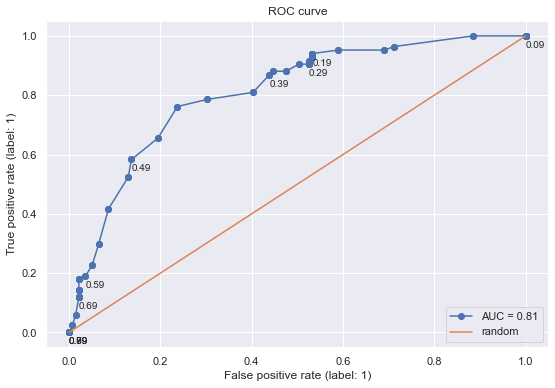

In [45]:
# Plot with details on thresholds
def my_roc_curve_plot_details(y_test_set, model_predicted_prob, th_formula = False):
    """
    Same INPUTS as my_roc_curve, details on thresholds, no parameters for plot customization
    OUTPUT: matplotlib chart
    """
    fpr, tpr, thresholds = my_roc_curve(y_test_set=y_test_set, model_predicted_prob=model_predicted_prob, th_formula = th_formula)
    auc = round(abs(np.trapz(tpr, fpr)), 2)
    plt.figure(figsize=(9,6))
    plt.plot(fpr, tpr, 'o-')
    plt.plot(np.linspace(0.0,1.0,10), np.linspace(0.0,1.0,10))
    # plot 1 thresholds value every 10
    for x, y, txt in zip(fpr[::10], tpr[::10], thresholds[::10]):
        plt.annotate(np.round(txt, 2), (x, y-0.04)) # shift y location to avoid overlapping 
    plt.xlabel("False positive rate (label: 1)")
    plt.ylabel("True positive rate (label: 1)")
    plt.legend([f"AUC = {auc}", "random"], loc='lower right')
    plt.title("ROC curve");

my_roc_curve_plot_details(y_test1, probs1) 
# overlapping thresholds values for (0,0) and (1,1) coordinates --> all the threshold values above and below the max and min of probs1
# substitue (for x, y, txt in zip(fpr[::10], tpr[::10], thresholds[::10]):) with (for x, y, txt in zip(fpr, tpr, thresholds):) to plot al thresholds values

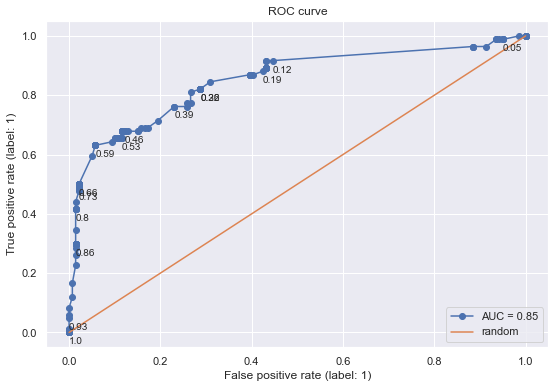

In [47]:
# Logistic
my_roc_curve_plot_details(y_test1, probs1_lr, th_formula=True) 